In [352]:
import torch
import numpy as np
import pandas as pd 
import pickle 
import matplotlib.pyplot as plt

In [353]:
def get_baseline_cyc(temp, metric): 
    base = 'figs/ising_learn'
    model_name = f'cyc_{temp}_cycles_5_stepsize_2.0_initbal_1.0'
    return np.load(f'{base}/{model_name}_{metric}.npy')

def get_baseline(temp, metric, step_size=.2, bal=.5): 
    base = 'figs/ising_learn'
    model_name = f'{temp}_stepsize_{str(step_size)}_{str(bal)}'
    return np.load(f'{base}/{model_name}_{metric}.npy')


In [354]:
baseline_a_s = get_baseline('dmala', 'a_s', step_size=.2)
epoch_mean = [baseline_a_s[(i)*100 : (i+1)*100].mean() for i in range(10000)]
epoch_arr = np.array([baseline_a_s[(i)*100 : (i+1)*100] for i in range(10000)])

Text(0.5, 1.0, 'Original DMALA Acceptance Rate Avg Within iteration')

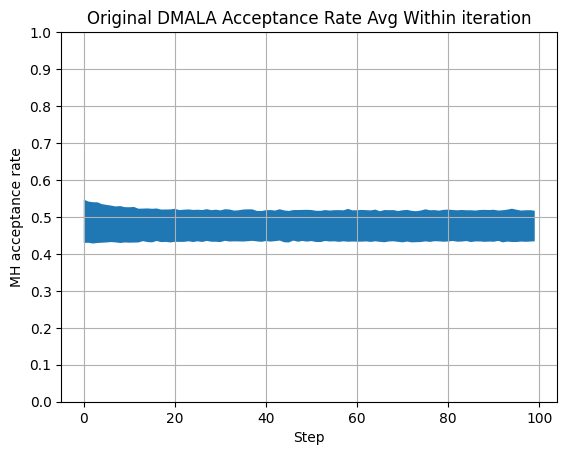

In [355]:
working_arr = epoch_arr[:1000, :]
std = working_arr.std(axis=0)
mean = working_arr.mean(axis=0)
plt.fill_between([i for i in range(100)], mean - std, mean + std)
plt.grid()
plt.yticks(np.linspace(0, 1, 11))
plt.ylabel('MH acceptance rate')
plt.xlabel('Step')
plt.title('Original DMALA Acceptance Rate Avg Within iteration')

In [356]:
exp_folder = "CycDmala_OuterLoop_10cyclesteps_BurnInBegin_NoStepsizeTune"
a_s_total = np.load(f"figs/ising_learn/{exp_folder}/cyc_dmala_alpha_max_budget_500_a_s.npy")
rmse = np.load(f"figs/ising_learn/{exp_folder}/cyc_dmala_alpha_max_budget_500_rmse.npy")
burnin_res = pickle.load(open(f"figs/ising_learn/{exp_folder}/cyc_dmala_alpha_max_budget_500_burnin_res", "rb"))

In [357]:
a_s_itr_arr = np.array([a_s_total[(i) * 10 : (i + 1)* 10] for i in range(9990)])

In [358]:
cycle_length = 10 
a_s_to_plot = l.mean(axis=1)
fig, ax = plt.subplots(2, figsize =(6, 8))
ax[0].plot([i * 1 for i in range(len(a_s_to_plot))], a_s_to_plot)
ax[0].grid()
ax[0].set_ylabel('acceptance rate')
ax[0].set_xlabel('cycle number')
ax[1].plot([i * 1000 for i in range(11)], np.log(rmse))
ax[1].grid()
ax[1].set_ylabel("log rmse")
ax[1].set_xlabel("Iteration")

AttributeError: 'list' object has no attribute 'mean'

In [359]:
l = []
for i in range(999): 
    l.append(a_s_itr_arr.mean(axis=1)[(i) *10: (i + 1)*10 ])

Text(0.5, 1.0, '')

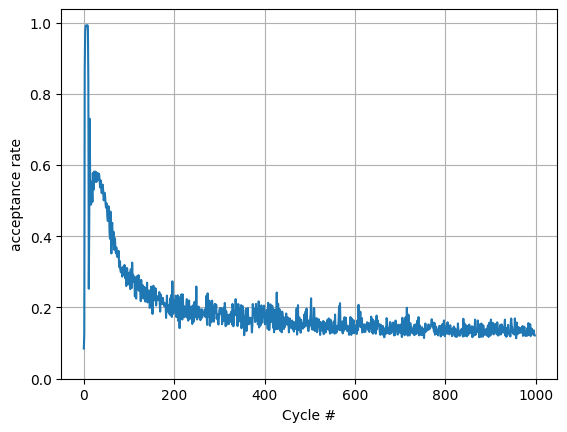

In [360]:
plt.plot(np.array(l)[:, :].mean(axis=1))
plt.grid()
plt.ylabel("acceptance rate")
plt.xlabel("Cycle #")
plt.yticks(np.linspace(0, 1.0, 6))
plt.title("")

Text(0.5, 1.0, 'Comparison of 1 vs 2 cycles')

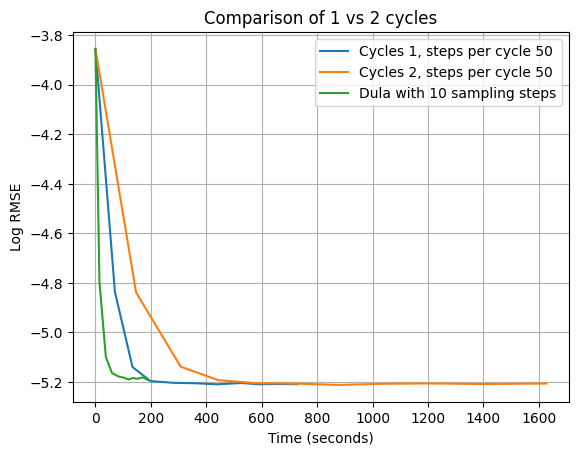

In [361]:
rmse_2 = np.load(f"figs/ising_learn/cyc_dula_cycles_2_stepsize_2.0_initbal_1.0_rmse.npy")
rmse_1 = np.load(f"figs/ising_learn/cyc_dula_cycles_1_stepsize_2.0_initbal_1.0_rmse.npy")
times_2 = np.load(f"figs/ising_learn/cyc_dula_cycles_2_stepsize_2.0_initbal_1.0_times.npy")
times_1 = np.load(f"figs/ising_learn/cyc_dula_cycles_1_stepsize_2.0_initbal_1.0_times.npy")

rmse_dula = np.load("figs/ising_learn/dula_stepsize_0.2_0.5_rmse.npy")
times_dula = np.load("figs/ising_learn/dula_stepsize_0.2_0.5_times.npy")


plt.plot(times_1, np.log(rmse_1), label="Cycles 1, steps per cycle 50")
plt.plot(times_2, np.log(rmse_2), label="Cycles 2, steps per cycle 50")
plt.plot(times_dula, np.log(rmse_dula), label="Dula with 10 sampling steps")
plt.legend()
plt.grid()
plt.ylabel("Log RMSE")
plt.xlabel("Time (seconds)")
plt.title("Comparison of 1 vs 2 cycles")

In [362]:
dmala_SbC_10_times = np.load(f"figs/ising_learn/cyc_dmala_manual_EE_ss_10_big_5.0_small_0.2_times.npy")
dmala_SbC_10_rmse = np.load(f"figs/ising_learn/cyc_dmala_manual_EE_ss_10_big_5.0_small_0.2_rmse.npy")

In [363]:
dmala_base_10_rmse = np.load(f"../discrete-langevin/figs/ising_learn/rmse_dmala_0.25_10.npy")
dmala_base_10_times = np.load(f"../discrete-langevin/figs/ising_learn/rmse_dmala_0.25_10.npy")


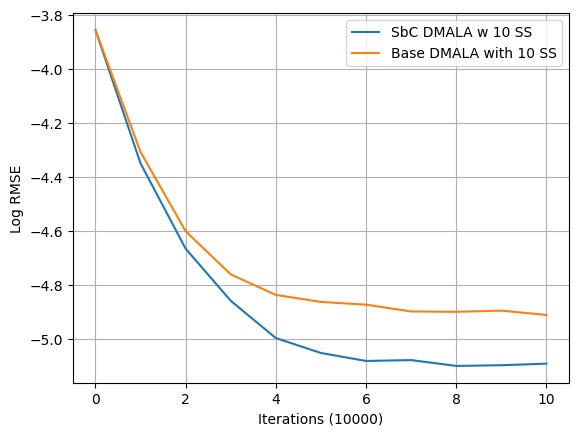

In [364]:
plt.plot(np.log(dmala_SbC_10_rmse), label = "SbC DMALA w 10 SS")
plt.plot(np.log(dmala_base_10_rmse), label = "Base DMALA with 10 SS")
plt.legend()
plt.xlabel("Iterations (10000)")
plt.ylabel("Log RMSE")

plt.grid()

In [365]:
dmala_SbC_30_times = np.load(f"figs/ising_learn/cyc_dmala_manual_EE_ss_30_big_2.0_small_0.2_times.npy")
dmala_SbC_30_rmse = np.load(f"figs/ising_learn/cyc_dmala_manual_EE_ss_30_big_2.0_small_0.2_rmse.npy")
dmala_base_30_rmse = np.load(f"../discrete-langevin/figs/ising_learn/rmse_dmala_0.25_30.npy")
dmala_base_30_times = np.load(f"../discrete-langevin/figs/ising_learn/rmse_dmala_0.25_30.npy")


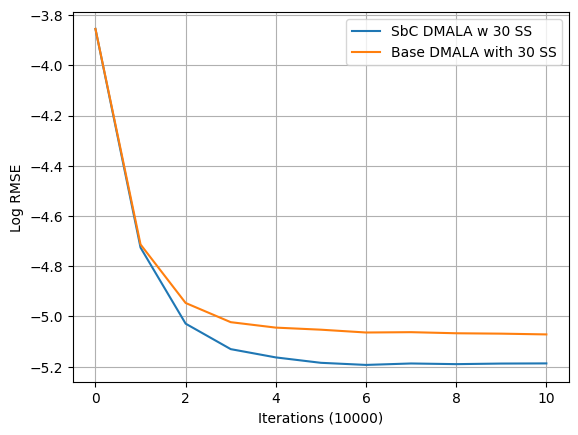

In [366]:
plt.plot(np.log(dmala_SbC_30_rmse), label = "SbC DMALA w 30 SS")
plt.plot(np.log(dmala_base_30_rmse), label = "Base DMALA with 30 SS")
plt.legend()
plt.xlabel("Iterations (10000)")
plt.ylabel("Log RMSE")

plt.grid()

In [367]:
dmala_SbC_30_a_s = np.load(f"figs/ising_learn/dmala_manual_EE_ss_30_big_5.0_small_0.2_a_s.npy")
iteration_a_s = []
for i in range(len(dmala_SbC_30_a_s) // 30): 
    iteration_a_s.append(dmala_SbC_30_a_s[(i) * 30 : (i+1) * 30])
iteration_a_s = np.array(iteration_a_s)

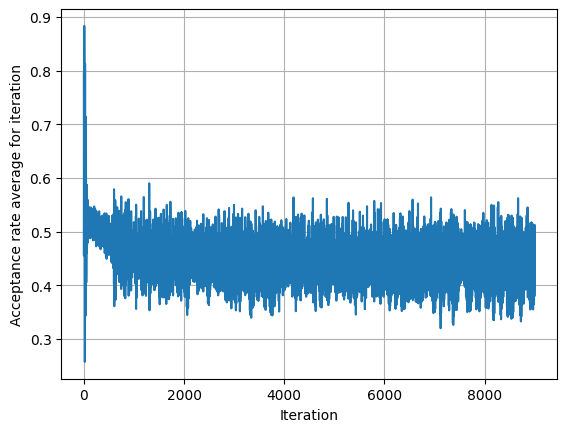

In [368]:
plt.plot(iteration_a_s.mean(axis=1))
plt.ylabel("Acceptance rate average for iteration")
plt.xlabel("Iteration")
plt.grid()

In [369]:
dmala_SbC_10_a_s = np.load(f"figs/ising_learn/cyc_dmala_manual_EE_ss_10_big_5.0_small_0.2_a_s.npy")
iteration_a_s = []
for i in range(len(dmala_SbC_10_a_s) // 10): 
    iteration_a_s.append(dmala_SbC_30_a_s[(i) * 10 : (i+1) * 10])
iteration_a_s = np.array(iteration_a_s)

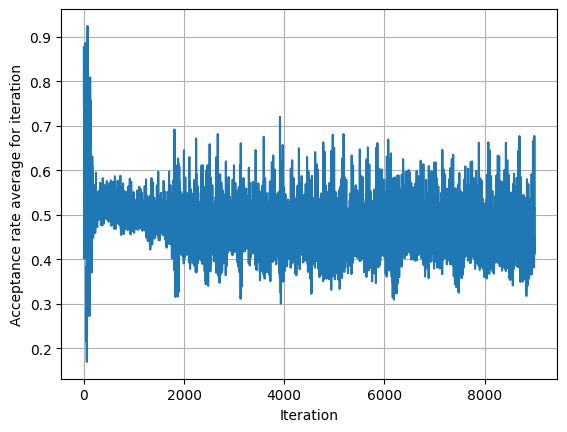

In [370]:
plt.plot(iteration_a_s.mean(axis=1))
plt.ylabel("Acceptance rate average for iteration")
plt.xlabel("Iteration")
plt.grid()

In [438]:
dula_SbC_30_a_s = np.load(f"figs/ising_learn/dula_stepsize_5.0_0.95_rmse.npy")
iteration_a_s = []
for i in range(len(dula_SbC_30_a_s) // 30): 
    iteration_a_s.append(dula_SbC_30_a_s[(i) * 30 : (i+1) * 30])
iteration_a_s = np.array(iteration_a_s)

Text(0, 0.5, 'Log RMSE')

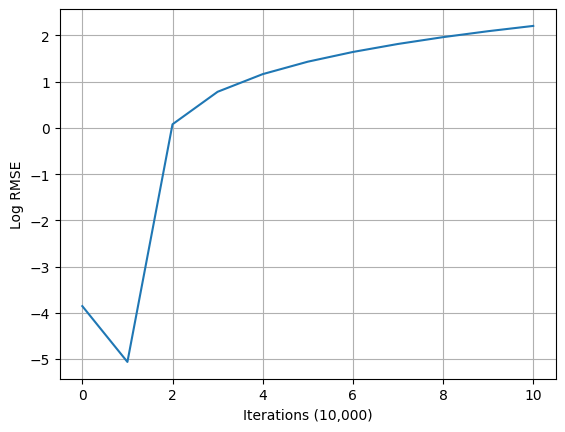

In [439]:
plt.plot(np.log(dula_SbC_30_a_s))
plt.grid()
plt.xlabel("Iterations (10,000)")
plt.ylabel("Log RMSE")

In [482]:
# how does alpha max change over time (when dist changes)? 
burnin_file = "figs/ising_learn/"
burnin_file += "cyc_dmala_manual_EE_ss_30_big_0.2_small_0.2_30_adapt_big_acc_cut_0.5_burnin_res"
burnin_res = np.load(burnin_file, allow_pickle=True)
seg = 18

In [483]:
burnin_res[seg]['alpha_max']

[50,
 50,
 50,
 50,
 47.52933022252546,
 47.52933022252546,
 47.52933022252546,
 45.175486913651476,
 45.175486913651476,
 45.175486913651476,
 45.175486913651476,
 45.175486913651476,
 42.93830122668802,
 40.81599979614373,
 38.79142004636655,
 38.79142004636655,
 38.79142004636655,
 36.87280115692706,
 36.87280115692706,
 36.87280115692706,
 36.87280115692706,
 35.05098861802381,
 35.05098861802381,
 33.31754051952186,
 31.67292171633034,
 31.67292171633034,
 30.108047614030404,
 30.108047614030404,
 30.108047614030404,
 30.108047614030404,
 28.617044725853276,
 27.2031492893838,
 27.2031492893838,
 25.86699881945397,
 24.592399997171423,
 23.378433902879074,
 22.223272699808867,
 22.223272699808867,
 22.223272699808867,
 22.223272699808867,
 22.223272699808867,
 21.12785108084291,
 20.087486666894563,
 20.087486666894563,
 19.09164939255027,
 18.14954414912569,
 18.14954414912569,
 17.25244809033135,
 16.399302536993147,
 16.399302536993147,
 15.587440551123418,
 15.587440551123418,

In [484]:
burnin_res[seg]['a_s']

[0.005535798033815808,
 0.004247411696997006,
 0.005569001309049781,
 0.005866044505091849,
 0.004686469424632378,
 0.005198513466166332,
 0.004759840323094977,
 0.0032823333047417693,
 0.0034984577519935555,
 0.00466709429747425,
 0.0044263054616749285,
 0.004778843614985817,
 0.005732325240387581,
 0.003973990619124379,
 0.004735900578089059,
 0.00712610011396464,
 0.005401223480293993,
 0.0040433541289530694,
 0.005620906432159245,
 0.005726236698683352,
 0.005919680159422569,
 0.007124800462042913,
 0.005449584491725545,
 0.006380489811999723,
 0.008412527764448896,
 0.00592682408168912,
 0.007106201857095584,
 0.006805606256239116,
 0.006672984187025577,
 0.004782605869695544,
 0.005925419618142769,
 0.006484551289759111,
 0.00882507914211601,
 0.007249050738755614,
 0.006365342775825411,
 0.005885976849822327,
 0.0063538015587255355,
 0.0064500418782699855,
 0.005348637988208793,
 0.0055916937330039215,
 0.007083572359988466,
 0.007586261391406879,
 0.0063311364327091725,
 0.0042

Text(0.5, 0, 'Step Size')

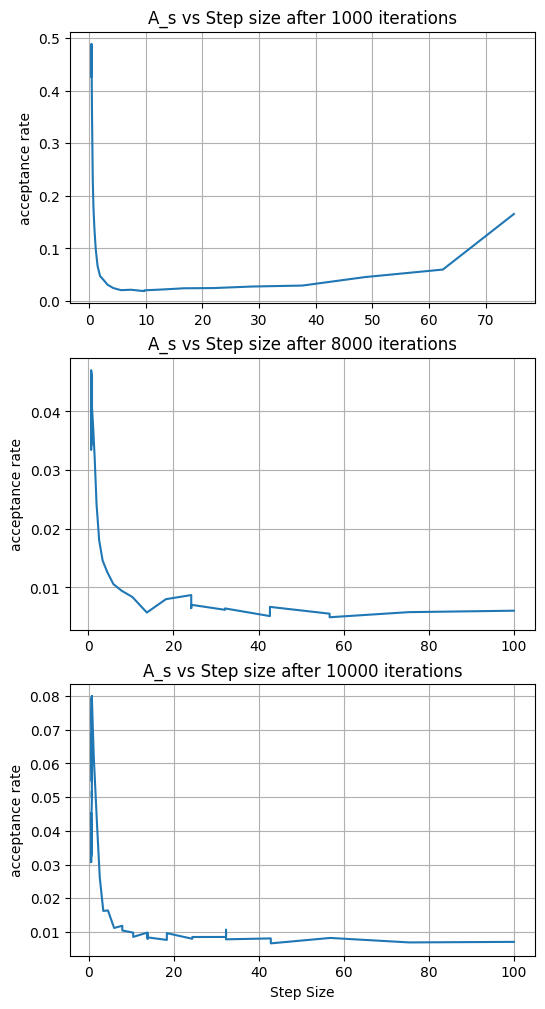

In [476]:
segment = 9
fig, ax = plt.subplots(3, 1, figsize=(6, 12))
for i, seg in enumerate([0, 7, 9]):
    ax[i].plot(burnin_res[seg]['alpha_max'], burnin_res[seg]['a_s'])
    ax[i].set_ylabel("acceptance rate")
    ax[i].set_title(f"A_s vs Step size after {seg+1}000 iterations")
    ax[i].grid()
plt.xlabel("Step Size")